First, import the packages we will need.

In [1]:
from asymmetric_uncertainty import a_u
import numpy as np, matplotlib.pyplot as plt
from astropy import units as u

We initialize our values by instantiating the `a_u` class:

In [2]:
A = a_u(3,0.2,0.4)
print(isinstance(A,u.Quantity))
A

True


<a_u 3.>

In [3]:
B = a_u(2.5,0.3,0.1)
B

<a_u 2.5>

We can now perform arithmetic operations, and the errors will propagate appropriately:

In [4]:
A+B

<a_u 5.5>

In [5]:
A-B

<a_u 0.5>

In [6]:
A*B

<a_u 7.5>

In [7]:
A/B

<a_u 1.2>

In [8]:
A**B

<a_u 15.58845727>

They even work with `numpy`!

In [9]:
np.sum([A,B])

5.5

`a_u` objects have a `.pdf()` method that evaluates the corresponding probability density at a given input. We can use this to conveniently plot the PDFs of the numbers themselves.

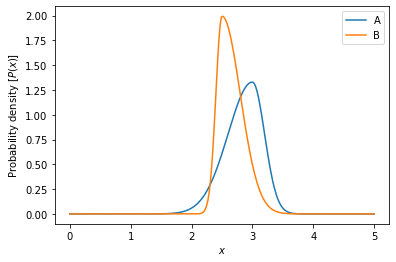

In [10]:
x = np.linspace(0,5,250)

plt.plot(x,A.pdf(x),label="A")
plt.plot(x,B.pdf(x),label="B")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("Probability density [$P(x)$]")
plt.show()

Similarly, there is a `.cdf()` method as well.

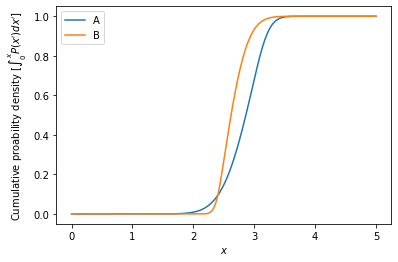

In [11]:
plt.plot(x,A.cdf(x),label="A")
plt.plot(x,B.cdf(x),label="B")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("Cumulative proability density [$\int_0^x P(x') dx'$]")
plt.show()

We can compare them logically. Of course, $3.0>2.5$:

In [12]:
A>B

True

But we also have the ability to use `>>` and `<<` as "significantly greater than" and "significantly less than". The errors overlap (i.e. $3.0-0.4\ngtr2.5+0.3$), so the following is false.

In [13]:
A>>B

False